This project is based on NFL standings from the offical NFL website.
We going to scrap the board from the season 2019 by importing the html, create our own DataFrame and visualize top team of the season.

In [32]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import time

In [33]:
#Imports the HTML into python
url = 'https://www.nfl.com/standings/league/2019/reg/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')

In [34]:
#Subsets the HTML to only get the HTML of our table needed
table = soup.find('table', {'summary':'Standings - Detailed View'})
table

<table class="d3-o-table d3-o-table--row-striping d3-o-table--detailed d3-o-standings--detailed d3-o-table--sortable {sortlist: [[4,1]], sortinitialorder: 'desc'}" data-require="modules/tableSortable" summary="Standings - Detailed View">
<caption class="d3-o-table__caption">
      Standings - Detailed View
    </caption>
<thead>
<tr>
<th aria-label="Division name" scope="col">
            NFL Team
          </th>
<th aria-label="WINS" scope="col">
            W
          </th>
<th aria-label="LOSSES" scope="col">
            L
          </th>
<th aria-label="TIES" scope="col">
            T
          </th>
<th aria-label="PCT" scope="col">
            PCT
          </th>
<th aria-label="PF" scope="col">
            PF
          </th>
<th aria-label="PA" scope="col">
            PA
          </th>
<th aria-label="NET PTS" scope="col">
            Net Pts
          </th>
<th aria-label="HOME" scope="col">
            Home
          </th>
<th aria-label="ROAD" scope="col">
            Roa

In [35]:
#Gets all the column headers of our table
headers = []
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)

In [36]:
#Creates a dataframe using the column headers from our table
df = pd.DataFrame(columns = headers)
df


,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct,Non-Conf,Strk,Last 5


In [37]:
#gets all our data within the table and adds it to our dataframe
for row in table.find_all('tr')[1:]:
    #line below fixes the formatting issue we had with the team names
    first_td = row.find_all('td')[0].find('div', class_ = 'd3-o-club-fullname').text.strip()
    data = row.find_all('td')[1:]
    row_data = [td.text.strip() for td in data]
    row_data.insert(0,first_td)
    length = len(df)
    df.loc[length] = row_data


In [38]:
df

,NFL Team,W,L,T,PCT,PF,PA,Net Pts,Home,Road,Div,Pct,Conf,Pct,Non-Conf,Strk,Last 5
0,Cincinnati Bengals,2,14,0,0.125,279,420,-141,2 - 6 - 0,0 - 8 - 0,1 - 5 - 0,0.167,2 - 10 - 0,0.167,0 - 4 - 0,1W,2 - 3 - 0
1,Detroit Lions,3,12,1,0.219,341,423,-82,2 - 6 - 0,1 - 6 - 1,0 - 6 - 0,0.000,2 - 9 - 1,0.208,1 - 3 - 0,9L,0 - 5 - 0
2,Washington Commanders,3,13,0,0.188,266,435,-169,1 - 7 - 0,2 - 6 - 0,0 - 6 - 0,0.000,2 - 10 - 0,0.167,1 - 3 - 0,4L,1 - 4 - 0
3,New York Giants,4,12,0,0.250,341,451,-110,2 - 6 - 0,2 - 6 - 0,2 - 4 - 0,0.333,3 - 9 - 0,0.250,1 - 3 - 0,1L,2 - 3 - 0
4,Arizona Cardinals,5,10,1,0.344,361,442,-81,2 - 5 - 1,3 - 5 - 0,1 - 5 - 0,0.167,3 - 8 - 1,0.292,2 - 2 - 0,1L,2 - 3 - 0
5,Carolina Panthers,5,11,0,0.313,340,470,-130,2 - 6 - 0,3 - 5 - 0,1 - 5 - 0,0.167,2 - 10 - 0,0.167,3 - 1 - 0,8L,0 - 5 - 0
6,Los Angeles Chargers,5,11,0,0.313,337,345,-8,2 - 6 - 0,3 - 5 - 0,0 - 6 - 0,0.000,3 - 9 - 0,0.250,2 - 2 - 0,3L,1 - 4 - 0
7,Miami Dolphins,5,11,0,0.313,306,494,-188,3 - 5 - 0,2 - 6 - 0,2 - 4 - 0,0.333,4 - 8 - 0,0.333,1 - 3 - 0,2W,3 - 2 - 0
8,Cleveland Browns,6,10,0,0.375,335,393,-58,4 - 4 - 0,2 - 6 - 0,3 - 3 - 0,0.500,6 - 6 - 0,0.500,0 - 4 - 0,3L,1 - 4 - 0
9,Jacksonville Jaguars,6,10,0,0.375,300,397,-97,3 - 5 - 0,3 - 5 - 0,2 - 4 - 0,0.333,6 - 6 - 0,0.500,0 - 4 - 0,1W,2 - 3 - 0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NFL Team  32 non-null     object
 1   W         32 non-null     object
 2   L         32 non-null     object
 3   T         32 non-null     object
 4   PCT       32 non-null     object
 5   PF        32 non-null     object
 6   PA        32 non-null     object
 7   Net Pts   32 non-null     object
 8   Home      32 non-null     object
 9   Road      32 non-null     object
 10  Div       32 non-null     object
 11  Pct       32 non-null     object
 12  Conf      32 non-null     object
 13  Pct       32 non-null     object
 14  Non-Conf  32 non-null     object
 15  Strk      32 non-null     object
 16  Last 5    32 non-null     object
dtypes: object(17)
memory usage: 4.5+ KB


In [47]:
# convert just columns "W" and "L"
df[["W", "L"]] = df[["W", "L"]].apply(pd.to_numeric)


In [52]:
# Let's see the top teams of the season

C:\Users\Stevy\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Stevy\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Stevy\Desktop\ml-course\heart-disease-project\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


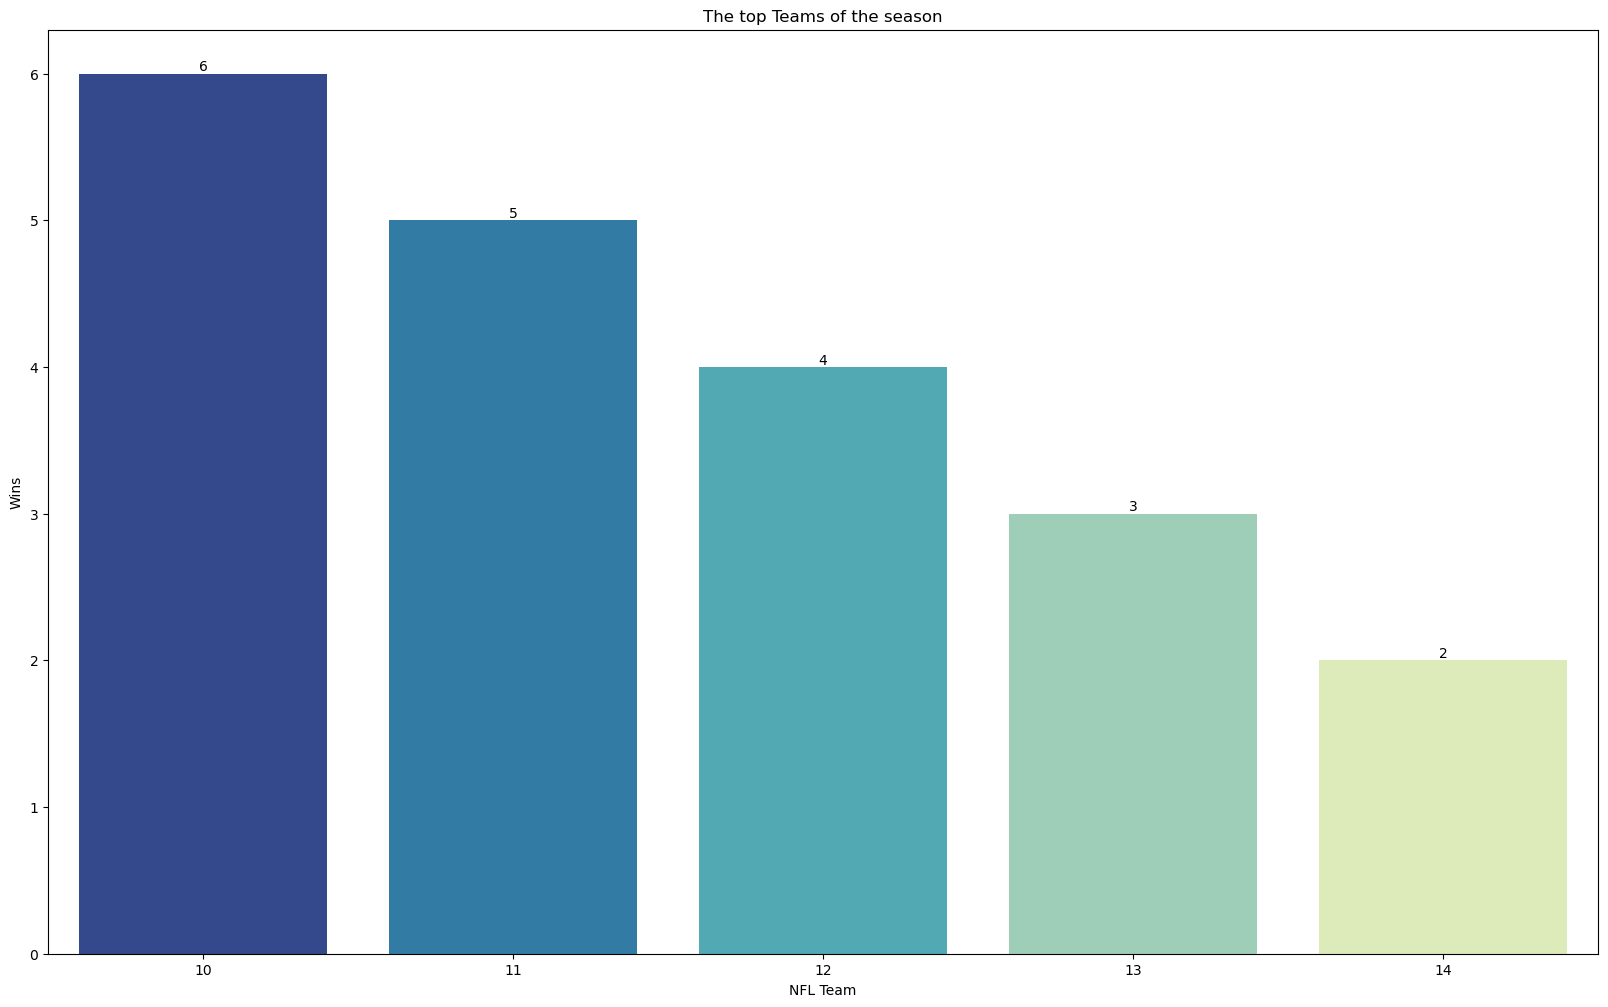

In [53]:
victories = df.sort_values("W", ascending=False)[:10]

plt.figure(figsize=(20,12))

ax = sns.barplot(x="W",
                 y="L",
                 palette="YlGnBu_r",
                 data= victories)
ax.bar_label(ax.containers[0])
ax.grid(False)

plt.xlabel("NFL Team")
plt.ylabel("Wins")
plt.title("The top Teams of the season")

plt.show()